**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd # for a data preprocessing
import numpy as np # linear algebra
from matplotlib import pyplot as plt # for visualization
from sklearn.tree import DecisionTreeClassifier # Model 
from sklearn.metrics import accuracy_score # To check the model accuracy
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # To dummify the data
import seaborn as sns # for the plots 
from sklearn.model_selection import train_test_split,GridSearchCV #for splitting the train dataset into train and test 
import time
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



***Reading Train dataset***

In [ ]:
train=pd.read_csv('/content/titanic_train.csv')

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape


(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

***Performing Visualization***

Text(0, 0.5, 'Passenger Count')

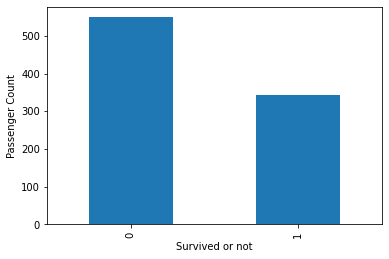

In [ ]:
#Passenger ID and Target column (Survived column)

plt1=train.Survived.value_counts().plot(kind='bar')
plt1.set_xlabel('Survived or not')
plt1.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

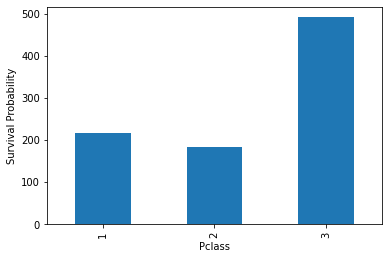

In [ ]:
#Pclass column ---> Survival probability

plt2 = train.Pclass.value_counts().sort_index().plot(kind='bar')
plt2.set_xlabel('Pclass')
plt2.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger Count')

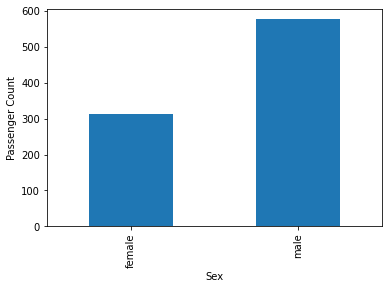

In [ ]:
# Sex column
plt3=train.Sex.value_counts().sort_index().plot(kind='bar')
plt3.set_xlabel('Sex')
plt3.set_ylabel('Passenger Count')



Text(0, 0.5, 'Survival Probability')

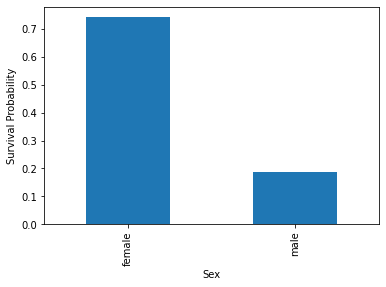

In [ ]:
# Survival probability based on Sex column

plt4=train[['Sex','Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt4.set_xlabel('Sex')
plt4.set_ylabel('Survival Probability')



Text(0, 0.5, 'Passenger Count')

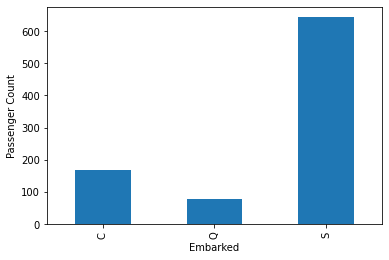

In [ ]:
# Embarked ----> most of them are from southampton(S)


plt5=train.Embarked.value_counts().sort_index().plot(kind='bar')
plt5.set_xlabel('Embarked')
plt5.set_ylabel('Passenger Count')



Text(0, 0.5, 'Survival Probability')

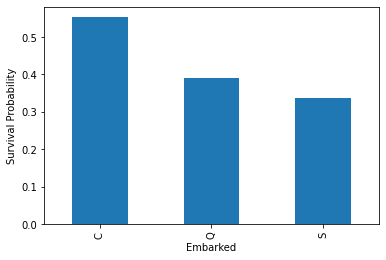

In [ ]:
# Survival probability based on probabilty

plt6=train[['Embarked','Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt6.set_xlabel('Embarked')
plt6.set_ylabel('Survival Probability')


Text(0, 0.5, 'Passenger Count')

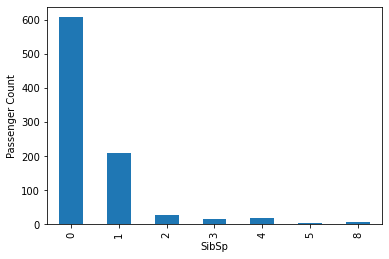

In [ ]:
# SibSp column  ----> Siblings/Spouse

plt7=train.SibSp.value_counts().sort_index().plot(kind='bar')
plt7.set_xlabel('SibSp')
plt7.set_ylabel('Passenger Count')


Text(0, 0.5, 'Survival Probability')

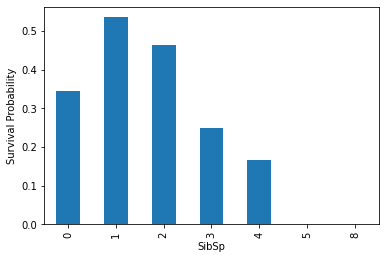

In [ ]:
# survival probability based on SibSp column

plt8=train[['SibSp','Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt8.set_xlabel('SibSp')
plt8.set_ylabel('Survival Probability')

Text(0, 0.5, 'Passenger Count')

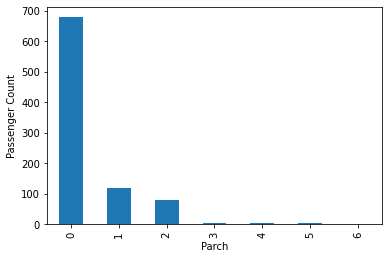

In [ ]:
# Parch ----> children / Parents

plt9=train.Parch.value_counts().sort_index().plot(kind='bar')
plt9.set_xlabel('Parch')
plt9.set_ylabel('Passenger Count') # As we can see the majority of them have no Children/Parents.



Text(0, 0.5, 'Survival Probability')

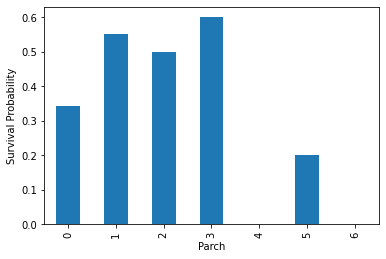

In [ ]:
# Survival probability based on Parch column

plt10=train[['Parch','Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt10.set_xlabel('Parch')
plt10.set_ylabel('Survival Probability') # the passengers having 3 childrens/Parents has more survival probablity

In [ ]:
# Embarked vs Pclass
#sns.factorplot('Pclass',col='Embarked',data=train,kind='count')

In [ ]:
# Pclass vs Sex

#sns.factorplot('Sex',col='Pclass',data=train,kind='count')


In [ ]:
# Embarked vs sex

#sns.factorplot('Sex',col='Embarked',data=train,kind='count')

<Axes: >

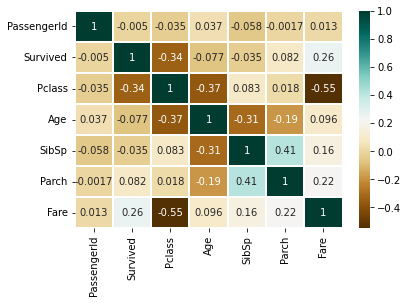

In [ ]:
# correlation between columns

corr_matrix = train.corr( )
sns.heatmap(data = corr_matrix,cmap='BrBG',annot=True,linewidths=0.2)


***preprocessing the train dataset***


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train['Age']=train['Age'].mode()[0]
train['Age'].fillna(train['Age'],inplace=True)



In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train['Embarked']=train['Embarked'].mode()[0]
train['Embarked'].fillna(train['Embarked'],inplace=True)

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
train.shape

(891, 12)

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,24.0,1,0,PC 17599,71.2833,C85,S
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,24.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,NaN,S


In [ ]:
train=train.drop(columns=['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare'])

In [ ]:
train.head(5)

,Survived,Sex,Age,Cabin,Embarked
0,0,male,24.0,NaN,S
1,1,female,24.0,C85,S
2,1,female,24.0,NaN,S
3,1,female,24.0,C123,S
4,0,male,24.0,NaN,S


In [ ]:
train

,Survived,Sex,Age,Cabin,Embarked
0,0,male,24.0,NaN,S
1,1,female,24.0,C85,S
2,1,female,24.0,NaN,S
3,1,female,24.0,C123,S
4,0,male,24.0,NaN,S
...,...,...,...,...,...
886,0,male,24.0,NaN,S
887,1,female,24.0,B42,S
888,0,female,24.0,NaN,S
889,1,male,24.0,C148,S


In [ ]:
train.shape

(891, 5)

In [ ]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
labelencoder=LabelEncoder()
train['Sex']=labelencoder.fit_transform(train['Sex'])
train['Embarked']=labelencoder.fit_transform(train['Embarked'])
train

,Survived,Sex,Age,Cabin,Embarked
0,0,1,24.0,NaN,0
1,1,0,24.0,C85,0
2,1,0,24.0,NaN,0
3,1,0,24.0,C123,0
4,0,1,24.0,NaN,0
...,...,...,...,...,...
886,0,1,24.0,NaN,0
887,1,0,24.0,B42,0
888,0,0,24.0,NaN,0
889,1,1,24.0,C148,0


In [ ]:
train.shape

(891, 5)

In [ ]:
# here we Extracting the deck from a cabin number

train['Deck']=train['Cabin'].str.slice(0,1)


# filling missing values with the "Unknown"

train['Deck']=train['Deck'].fillna("Unknown")

# Encode the "Deck" column using one-hot encoding

encoder = OneHotEncoder()
encoded = encoder.fit_transform(train[['Deck']]).toarray()
train = pd.concat([train,pd.DataFrame(encoded,columns = ['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T','Deck_Unknown'])],axis=1)

#Drop the original "Cabin" column
train = train.drop(columns = ['Cabin'])


          




In [ ]:
train

,Survived,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,0,1,24.0,0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,24.0,0,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,24.0,0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,24.0,0,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,24.0,0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,24.0,0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,0,24.0,0,B,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,0,24.0,0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,24.0,0,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labelencoder=LabelEncoder()
train['Deck']=labelencoder.fit_transform(train['Deck'])
train

,Survived,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,0,1,24.0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,24.0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,24.0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,24.0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,24.0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,24.0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,0,24.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,0,24.0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,24.0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train['Deck_A']=train['Deck_A'].astype(int)
train['Deck_B']=train['Deck_B'].astype(int)
train['Deck_C']=train['Deck_C'].astype(int)
train['Deck_D']=train['Deck_C'].astype(int)
train['Deck_E']=train['Deck_E'].astype(int)
train['Deck_F']=train['Deck_F'].astype(int)
train['Deck_G']=train['Deck_G'].astype(int)
train['Deck_T']=train['Deck_T'].astype(int)
train['Deck_Unknown']=train['Deck_Unknown'].astype(int)

In [ ]:
train.head(5)

,Survived,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown
0,0,1,24.0,0,8,0,0,0,0,0,0,0,0,1
1,1,0,24.0,0,2,0,0,1,1,0,0,0,0,0
2,1,0,24.0,0,8,0,0,0,0,0,0,0,0,1
3,1,0,24.0,0,2,0,0,1,1,0,0,0,0,0
4,0,1,24.0,0,8,0,0,0,0,0,0,0,0,1


In [ ]:
train.drop(columns=['Deck_T'])

,Survived,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown
0,0,1,24.0,0,8,0,0,0,0,0,0,0,1
1,1,0,24.0,0,2,0,0,1,1,0,0,0,0
2,1,0,24.0,0,8,0,0,0,0,0,0,0,1
3,1,0,24.0,0,2,0,0,1,1,0,0,0,0
4,0,1,24.0,0,8,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,24.0,0,8,0,0,0,0,0,0,0,1
887,1,0,24.0,0,1,0,1,0,0,0,0,0,0
888,0,0,24.0,0,8,0,0,0,0,0,0,0,1
889,1,1,24.0,0,2,0,0,1,1,0,0,0,0


In [ ]:
train.shape

(891, 14)

In [ ]:
train.columns

Index(['Survived', 'Sex', 'Age', 'Embarked', 'Deck', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_Unknown'],
      dtype='object')

***Model Building*** 

In [ ]:
# split the dataset 

X = train[[ 'Sex', 'Age', 'Embarked', 'Deck', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_Unknown']]

y = train['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
start_time = time.time()

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth = 5)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds ")

Execution time: 0.03 seconds 


In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0])

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score,\
     recall_score, precision_score
    
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))   

In [ ]:
print("Train")
evaluate_model(y_train, y_pred_train)
print("Test")
evaluate_model(y_test, y_pred_test)

Train
Confusion Matrix 
 [[376  68]
 [ 80 188]]
Accurcay :  0.7921348314606742
Recall   :  0.7014925373134329
Precision:  0.734375
Test
Confusion Matrix 
 [[87 18]
 [21 53]]
Accurcay :  0.7821229050279329
Recall   :  0.7162162162162162
Precision:  0.7464788732394366


In [ ]:
#y_test.to_csv('train_X_test.csv',index = False)

***Reading Test Dataset*** 

In [ ]:
test = pd.read_csv('/content/titanic_test.csv')


In [ ]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


***Visualition On Test Dataset*** 

Text(0, 0.5, 'Passenger Count')

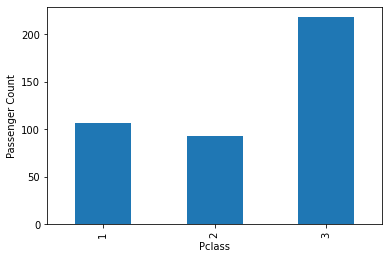

In [ ]:
test_plt1=test.Pclass.value_counts().sort_index().plot(kind='bar')
test_plt1.set_xlabel('Pclass')
test_plt1.set_ylabel('Passenger Count')



Text(0, 0.5, 'Passenger Count')

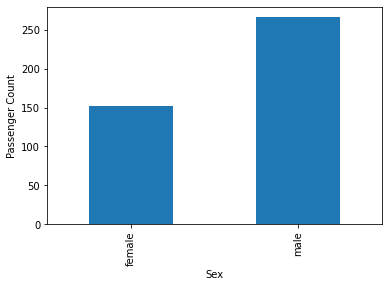

In [ ]:
test_plt2=test.Sex.value_counts().sort_index().plot(kind='bar')
test_plt2.set_xlabel('Sex')
test_plt2.set_ylabel('Passenger Count')



Text(0, 0.5, 'Passenger Count')

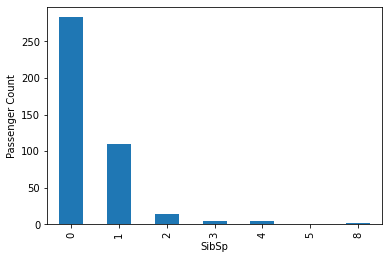

In [ ]:
test_plt3=test.SibSp.value_counts().sort_index().plot(kind='bar')
test_plt3.set_xlabel('SibSp')
test_plt3.set_ylabel('Passenger Count')


Text(0, 0.5, 'Passenger Count')

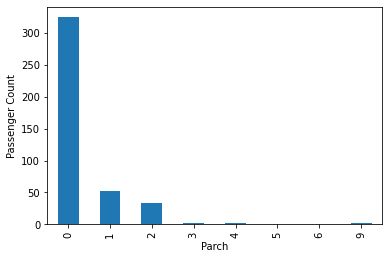

In [ ]:
test_plt4=test.Parch.value_counts().sort_index().plot(kind='bar')
test_plt4.set_xlabel('Parch')
test_plt4.set_ylabel('Passenger Count')


Text(0, 0.5, 'Passenger Count')

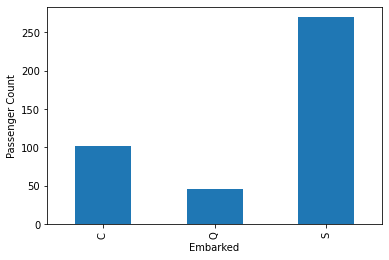

In [ ]:
test_plt5=test.Embarked.value_counts().sort_index().plot(kind='bar')
test_plt5.set_xlabel('Embarked')
test_plt5.set_ylabel('Passenger Count')


In [ ]:
# Embarked vs Pclass

#sns.factorplot('Pclass',col='Embarked',data=test,kind='count')

In [ ]:
# Pclass vs Sex

#sns.factorplot('Sex',col='Pclass',data=test,kind='count')


In [ ]:
# Embarked vs sex

#sns.factorplot('Sex',col='Embarked',data=test,kind='count')

<Axes: >

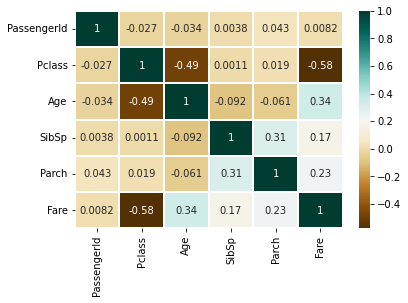

In [ ]:
# correlation between columns

corr_matrix = test.corr( )
sns.heatmap(data = corr_matrix,cmap='BrBG',annot=True,linewidths=0.2)

 **Preprocessing On Test Dataset**

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# filling NaN values of Age with the mode

test['Age']=test['Age'].mode()[0]
test['Age'].fillna(test['Age'],inplace=True)


In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test=test.drop(columns=['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare'])

In [ ]:
test.head(5)

,Sex,Age,Cabin,Embarked
0,male,21.0,NaN,Q
1,female,21.0,NaN,S
2,male,21.0,NaN,Q
3,male,21.0,NaN,S
4,female,21.0,NaN,S


In [ ]:
test.shape

(418, 4)

In [ ]:
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [ ]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
labelencoder=LabelEncoder()
test['Sex']=labelencoder.fit_transform(test['Sex'])
test['Embarked']=labelencoder.fit_transform(test['Embarked'])
test

,Sex,Age,Cabin,Embarked
0,1,21.0,NaN,1
1,0,21.0,NaN,2
2,1,21.0,NaN,1
3,1,21.0,NaN,2
4,0,21.0,NaN,2
...,...,...,...,...
413,1,21.0,NaN,2
414,0,21.0,C105,0
415,1,21.0,NaN,2
416,1,21.0,NaN,2


In [ ]:
# here we Extracting the deck from a cabin number

test['Deck']=test['Cabin'].str.slice(0,1)


# filling missing values with the "Unknown"

test['Deck']=test['Deck'].fillna("Unknown")

# Encode the "Deck" column using one-hot encoding

encoder = OneHotEncoder()
encoded = encoder.fit_transform(test[['Deck']]).toarray()
test = pd.concat([test,pd.DataFrame(encoded,columns = ['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_Unknown'])],axis=1)

#Drop the original "Cabin" column
test = test.drop(columns = ['Cabin'])

In [ ]:
test.head(5)

,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown
0,1,21.0,1,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,21.0,2,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,21.0,1,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,21.0,2,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,21.0,2,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
labelencoder=LabelEncoder()
test['Deck']=labelencoder.fit_transform(test['Deck'])
test

,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown
0,1,21.0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,21.0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,21.0,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,21.0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,21.0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,21.0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0,21.0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415,1,21.0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,1,21.0,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test['Deck_A']=test['Deck_A'].astype(int)
test['Deck_B']=test['Deck_B'].astype(int)
test['Deck_C']=test['Deck_C'].astype(int)
test['Deck_D']=test['Deck_C'].astype(int)
test['Deck_E']=test['Deck_E'].astype(int)
test['Deck_F']=test['Deck_F'].astype(int)
test['Deck_G']=test['Deck_G'].astype(int)
test['Deck_Unknown']=test['Deck_Unknown'].astype(int)

In [ ]:
test.head(5)

,Sex,Age,Embarked,Deck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Unknown
0,1,21.0,1,7,0,0,0,0,0,0,0,1
1,0,21.0,2,7,0,0,0,0,0,0,0,1
2,1,21.0,1,7,0,0,0,0,0,0,0,1
3,1,21.0,2,7,0,0,0,0,0,0,0,1
4,0,21.0,2,7,0,0,0,0,0,0,0,1


In [ ]:
test.shape

(418, 12)

In [ ]:
test.columns

Index(['Sex', 'Age', 'Embarked', 'Deck', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Unknown'],
      dtype='object')

In [ ]:
y_pred = model.predict(test)

In [ ]:
samples_submission = pd.DataFrame({'Survived':y_pred})

In [ ]:
samples_submission.to_csv('predicted_Survived.csv',index=False)